In [1]:
!pip install easyocr

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/e4/ae/2ad8820045b6631965750435f28583e80905b8273d57cf026163b51323ee/torch-2.1.2-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.1.2-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d6/a8/43e5033f9b2f727c158456e0720f870030ad3685c46f41ca3ca901b54922/torch-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.1.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
Using cached torch-2.1.1-cp311-cp311-win_amd64.whl (192.3 MB)


In [2]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image

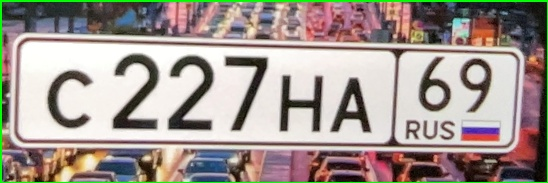

In [3]:
Image("D:\Car number plate detection\plates\scaned_img_0.jpg")

In [4]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
output = reader.readtext('D:\Car number plate detection\plates\scaned_img_0.jpg')

In [6]:
output

[([[40, 42], [383, 42], [383, 145], [40, 145]], 'C227HA', 0.9294106687252353),
 ([[410, 50], [502, 50], [502, 122], [410, 122]], '69', 0.9999925668480367),
 ([[402, 116], [460, 116], [460, 146], [402, 146]], 'RUS', 0.9998972442128196)]

In [7]:
cord = output[-1][0]

In [8]:
cord

[[402, 116], [460, 116], [460, 146], [402, 146]]

In [9]:
a = list(zip(*cord))
a

[(402, 460, 460, 402), (116, 116, 146, 146)]

In [10]:
min(a[0])

402

In [11]:
min(a[1])

116

In [12]:
max(a[0])

460

In [13]:
max(a[1])

146

In [14]:

x_min, y_min = [int(min(idx)) for idx in zip(*cord)]

In [15]:
x_min, y_min

(402, 116)

In [16]:

x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

In [17]:
x_max, y_max

(460, 146)

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 30

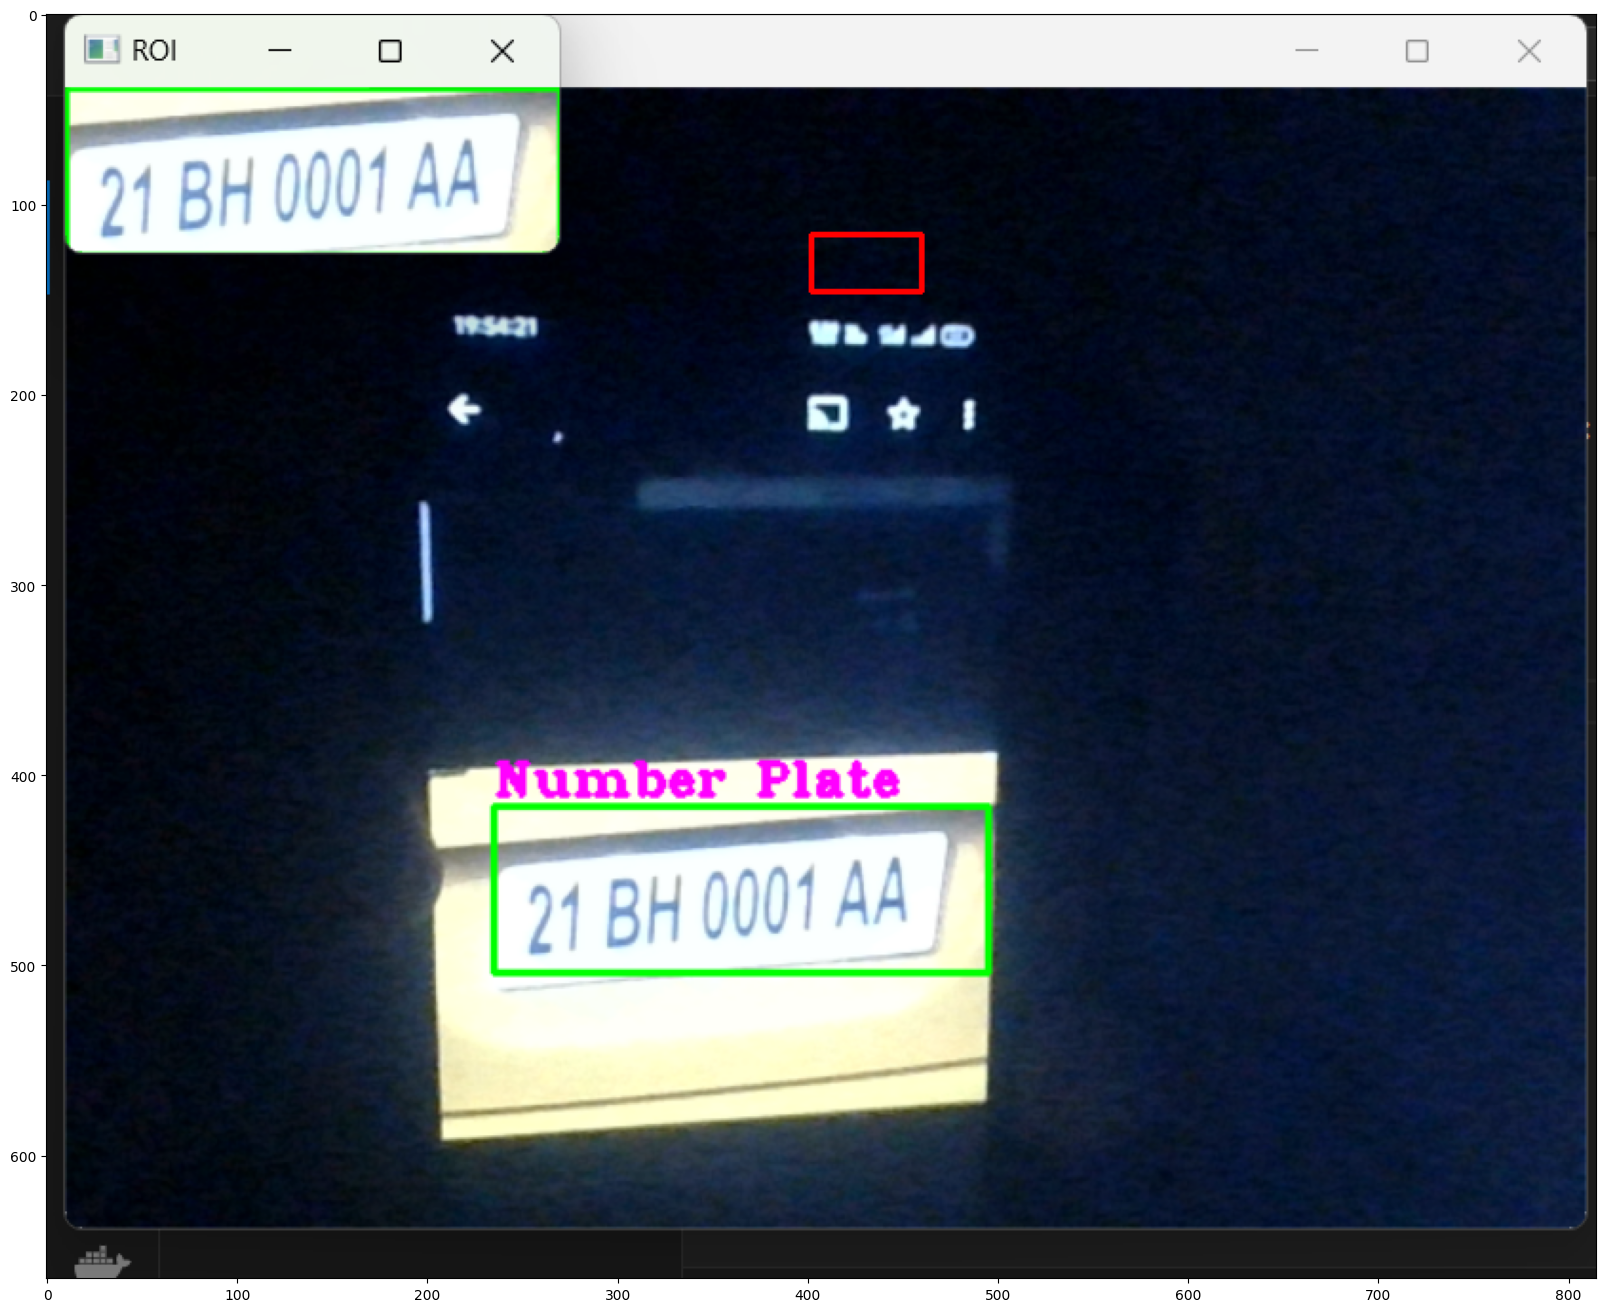

In [19]:
image = cv2.imread('D:\Car number plate detection\plates\Screenshot 2024-01-07 195445.png')
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))